In [1]:
import polars as pl
import pandas as pd
import numpy as np
import polars.selectors as cs
import matplotlib.pyplot as plt

In [2]:
df = pl.read_csv("../temp/df_imputed.csv")

In [3]:
df.shape
df.columns

['v2x_polyarchy',
 'v2x_libdem',
 'v2x_partipdem',
 'v2x_delibdem',
 'v2x_egaldem',
 'v2x_mpi',
 'v2xel_frefair',
 'v2x_liberal',
 'v2xcl_rol',
 'v2x_jucon',
 'v2xlg_legcon',
 'v2xdl_delib',
 'v2x_egal',
 'v2xeg_eqprotec',
 'v2xeg_eqaccess',
 'v2xeg_eqdr',
 'v2elembaut',
 'v2elembcap',
 'v2elrgstry',
 'v2elvotbuy',
 'v2elirreg',
 'v2elintim',
 'v2elpeace',
 'v2elboycot',
 'v2elfrfair',
 'v2elaccept',
 'v2elffelr',
 'v2elsnlsff',
 'v2psprlnks',
 'v2psplats',
 'v2exrmhsol_4',
 'v2exctlhg_0',
 'v2exctlhg_5',
 'v2exrmhgnp_0',
 'v2exrescon',
 'v2exbribe',
 'v2exembez',
 'v2excrptps',
 'v2exthftps',
 'v2regsupgroups_9',
 'v2regsupgroups_10',
 'v2regsupgroups_12',
 'v2lginvstp',
 'v2lgotovst',
 'v2lgcrrpt',
 'v2dlreason',
 'v2dlcommon',
 'v2dlconslt',
 'v2dlencmps',
 'v2jupurge',
 'v2jupoatck',
 'v2jupack',
 'v2juaccnt',
 'v2jucorrdc',
 'v2juhcind',
 'v2juncind',
 'v2juhccomp',
 'v2jucomp',
 'v2cltort',
 'v2clkill',
 'v2cltrnslw',
 'v2clrspct',
 'v2clacjstm',
 'v2clacjstw',
 'v2clacjust',
 'v

In [4]:
df.head()

v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_mpi,v2xel_frefair,v2x_liberal,v2xcl_rol,v2x_jucon,v2xlg_legcon,v2xdl_delib,v2x_egal,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr,v2elembaut,v2elembcap,v2elrgstry,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elboycot,v2elfrfair,v2elaccept,v2elffelr,v2elsnlsff,v2psprlnks,v2psplats,v2exrmhsol_4,v2exctlhg_0,v2exctlhg_5,v2exrmhgnp_0,v2exrescon,v2exbribe,v2exembez,…,e_v2x_libdem_3C_imputed_rf,e_v2x_libdem_4C_imputed_rf,e_v2x_libdem_5C_imputed_rf,e_v2x_mpi_3C_imputed_rf,e_v2x_mpi_4C_imputed_rf,e_v2x_mpi_5C_imputed_rf,e_v2x_partipdem_3C_imputed_rf,e_v2x_partipdem_4C_imputed_rf,e_v2x_partipdem_5C_imputed_rf,e_v2xps_party_4C_imputed_rf,e_v2xps_party_5C_imputed_rf,e_v2x_EDcomp_thick_3C_imputed_rf,e_v2x_EDcomp_thick_4C_imputed_rf,e_v2x_EDcomp_thick_5C_imputed_rf,e_v2x_liberal_4C_imputed_rf,e_v2x_liberal_5C_imputed_rf,e_v2x_api_3C_imputed_rf,e_v2x_polyarchy_3C_imputed_rf,e_v2x_polyarchy_4C_imputed_rf,e_v2x_polyarchy_5C_imputed_rf,e_fh_rol_imputed_rf,e_fh_cl_imputed_rf,e_fh_pr_imputed_rf,e_fh_status_imputed_rf,e_wbgi_cce_imputed_rf,e_wbgi_pve_imputed_rf,e_wbgi_rle_imputed_rf,e_wbgi_vae_imputed_rf,e_wbgi_rqe_imputed_rf,e_wbgi_gee_imputed_rf,e_uds_median_imputed_rf,e_uds_pct025_imputed_rf,e_uds_pct975_imputed_rf,e_ti_cpi_imputed_rf,e_vanhanen_imputed_rf,e_peaveduc_imputed_rf,e_gdppc_imputed_rf
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0.246,0.107,0.144,0.125,0.128,0.015,0.102,0.264,0.462,0.282,0.027,0.318,0.332,0.355,0.377,0.213,-0.923,0.059,-1.018,-2.585,-1.66,-1.407,-0.744,-0.4,-2.856,0.359,-2.84,-0.999,-0.754,1.981,0.286,0.15692,0.58564,0.19171,0.39,-2.243,-0.886,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
0.249,0.109,0.146,0.125,0.128,0.015,0.102,0.264,0.462,0.282,0.027,0.318,0.33,0.359,0.377,0.213,-0.923,0.059,-1.018,-2.585,-1.66,-1.407,-0.744,-0.4,-2.856,0.359,-2.84,-0.999,-0.754,1.981,0.286,0.15692,0.58176,0.19171,0.39,-2.243,-0.886,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0
0.249,0.109,0.146,0.125,0.131,0.015,0.102,0.264,0.462,0.282,0.027,0.318,0.336,0.359,0.377,0.234,-0.923,0.059,-1.017,-2.593,-1.648,-1.405,-0.74,-0.978,-2.872,0.34,-2.84,-0.999,-0.754,1.981,0.286,0.15833,0.5821,0.19171,0.39,-2.243,-0.886,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0
0.249,0.108,0.146,0.126,0.131,0.016,0.111,0.264,0.462,0.282,0.027,0.318,0.336,0.359,0.377,0.234,-0.923,0.469,-1.017,-2.593,-1.648,-1.405,-0.74,-0.978,-2.872,0.34,-2.84,-0.999,-0.754,1.981,0.286,0.16333,0.57806,0.19171,0.39,-2.243,-0.886,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0
0.249,0.108,0.146,0.126,0.131,0.016,0.111,0.262,0.464,0.282,0.027,0.318,0.336,0.359,0.377,0.234,-0.923,0.469,-1.017,-2.593,-1.648,-1.405,-0.74,-0.978,-2.872,0.34,-2.84,-0.999,-0.754,1.981,0.286,0.16333,0.57806,0.19171,0.39,-2.243,-0.886,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0


In [5]:
numeric_df = df.select(cs.numeric())

In [6]:
numeric_df.shape

(9129, 361)

In [7]:
corr_df = numeric_df.corr()

/Users/paulotto/Developer/hertieAssignments/mlPaper/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/paulotto/Developer/hertieAssignments/mlPaper/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [8]:
print(corr_df)

shape: (361, 361)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ v2x_polya ┆ v2x_libde ┆ v2x_parti ┆ v2x_delib ┆ … ┆ e_ti_cpi_ ┆ e_vanhane ┆ e_peavedu ┆ e_gdppc_ │
│ rchy      ┆ m         ┆ pdem      ┆ dem       ┆   ┆ imputed_r ┆ n_imputed ┆ c_imputed ┆ imputed_ │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f         ┆ _rf       ┆ _rf       ┆ rf       │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ 0.976896  ┆ 0.971177  ┆ 0.971669  ┆ … ┆ -0.148316 ┆ -0.044193 ┆ -0.030362 ┆ 0.013855 │
│ 0.976896  ┆ 1.0       ┆ 0.970329  ┆ 0.982337  ┆ … ┆ -0.12166  ┆ -0.042955 ┆ -0.035314 ┆ 0.009977 │
│ 0.971177  ┆ 0.970329  ┆ 1.0       ┆ 0.966631  ┆ … ┆ -0.147644 ┆ -0.0435

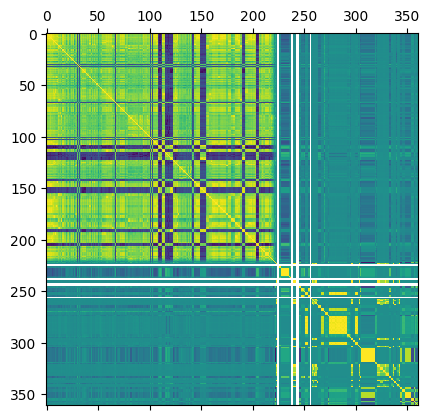

In [9]:
plt.matshow(corr_df)
# plt.savefig("./correaltion_matrix.png", dpi=300)
plt.show()

In [10]:
corr_df.columns

['v2x_polyarchy',
 'v2x_libdem',
 'v2x_partipdem',
 'v2x_delibdem',
 'v2x_egaldem',
 'v2x_mpi',
 'v2xel_frefair',
 'v2x_liberal',
 'v2xcl_rol',
 'v2x_jucon',
 'v2xlg_legcon',
 'v2xdl_delib',
 'v2x_egal',
 'v2xeg_eqprotec',
 'v2xeg_eqaccess',
 'v2xeg_eqdr',
 'v2elembaut',
 'v2elembcap',
 'v2elrgstry',
 'v2elvotbuy',
 'v2elirreg',
 'v2elintim',
 'v2elpeace',
 'v2elboycot',
 'v2elfrfair',
 'v2elaccept',
 'v2elffelr',
 'v2elsnlsff',
 'v2psprlnks',
 'v2psplats',
 'v2exrmhsol_4',
 'v2exctlhg_0',
 'v2exctlhg_5',
 'v2exrmhgnp_0',
 'v2exrescon',
 'v2exbribe',
 'v2exembez',
 'v2excrptps',
 'v2exthftps',
 'v2regsupgroups_9',
 'v2regsupgroups_10',
 'v2regsupgroups_12',
 'v2lginvstp',
 'v2lgotovst',
 'v2lgcrrpt',
 'v2dlreason',
 'v2dlcommon',
 'v2dlconslt',
 'v2dlencmps',
 'v2jupurge',
 'v2jupoatck',
 'v2jupack',
 'v2juaccnt',
 'v2jucorrdc',
 'v2juhcind',
 'v2juncind',
 'v2juhccomp',
 'v2jucomp',
 'v2cltort',
 'v2clkill',
 'v2cltrnslw',
 'v2clrspct',
 'v2clacjstm',
 'v2clacjstw',
 'v2clacjust',
 'v

In [23]:
# Suppose corr_df is your wide N×N matrix:
#   columns = row names = variable names

target = "v2x_corr"

# 1. Extract the target column as a list of values
corr_vals = corr_df[target].to_list()

# 2. Pair each variable name with its correlation
pairs = list(zip(corr_df.columns, corr_vals))

# 3. Build a long-format DF, explicitly orienting rows
long_df = pl.DataFrame(pairs, schema=["variable", "corr"], orient="row")

# 4. Drop self, rank by |corr|, sort descending, take top 5
top_corrs = (
    long_df.filter(pl.col("variable") != target)
    .with_columns(pl.col("corr").abs().alias("abs_corr"))
    .sort("abs_corr", descending=True)
    .drop_nans()
)

print("Top 5 variables most strongly correlated with", target)
print(top_corrs)

Top 5 variables most strongly correlated with v2x_corr
shape: (352, 3)
┌───────────────────────────────┬───────────┬──────────┐
│ variable                      ┆ corr      ┆ abs_corr │
│ ---                           ┆ ---       ┆ ---      │
│ str                           ┆ f64       ┆ f64      │
╞═══════════════════════════════╪═══════════╪══════════╡
│ e_v2x_corr_5C                 ┆ 0.980897  ┆ 0.980897 │
│ v2xnp_regcorr                 ┆ 0.980437  ┆ 0.980437 │
│ e_v2x_corr_4C                 ┆ 0.971198  ┆ 0.971198 │
│ v2x_execorr                   ┆ 0.943616  ┆ 0.943616 │
│ v2x_pubcorr                   ┆ 0.941203  ┆ 0.941203 │
│ …                             ┆ …         ┆ …        │
│ e_v2x_partipdem_5C_imputed_rf ┆ 0.00504   ┆ 0.00504  │
│ v2elembcap_imputed            ┆ -0.004893 ┆ 0.004893 │
│ v2x_liberal_imputed_rf        ┆ -0.00078  ┆ 0.00078  │
│ e_v2x_liberal_4C_imputed_rf   ┆ -0.00078  ┆ 0.00078  │
│ e_v2x_liberal_5C_imputed_rf   ┆ -0.00078  ┆ 0.00078  │
└────────────────

In [40]:
top_corrs_filtered = top_corrs.filter(pl.col("abs_corr") > 0.65)

In [41]:
len(top_corrs_filtered)

72